<a href="https://colab.research.google.com/github/kimdonggyu2008/audio_deeplearning_python/blob/main/mlp_%EC%9D%8C%EC%95%85%EC%9E%A5%EB%A5%B4_%EB%B6%84%EB%A5%98%EA%B8%B0_%EA%B3%BC%EC%A0%81%ED%95%A9_%EB%B0%A9%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
DATA_PATH="/content/drive/MyDrive/오디오_딥러닝_파이썬/result/data_10.json"


In [ ]:
def load_data(data_path):

  with open(data_path,"r") as fp:
    data=json.load(fp)#파일 읽어오기

  X=np.array(data["mfcc"])#각 태그에 맞는 데이터 읽어오기
  y=np.array(data["labels"])

  print("DATA LOADED!")
  return X,y

In [ ]:
def plot_history(history):
  fig,axs=plt.subplot(2)
#정확도 그래프 그리기
  axs[0].plot(history.history["accuracy"],label="train accuracy")
  axs[0].plot(history.history["val_accuracy"],label="test accuracy")
  axs[0].set_ylabel("accuracy")
  axs[0].legend(loc="lower right")
  axs[0].set_title("accuracy eval")
#에러 그래프 그리기
  axs[1].plot(history.history["loss"],label="train accuracy")
  axs[1].plot(history.history["val_loss"],label="test accuracy")
  axs[1].set_ylabel("error")
  axs[1].set_xlabel("epoch")
  axs[1].legend(loc="upper right")
  axs[1].set_title("error eval")

  plt.show()

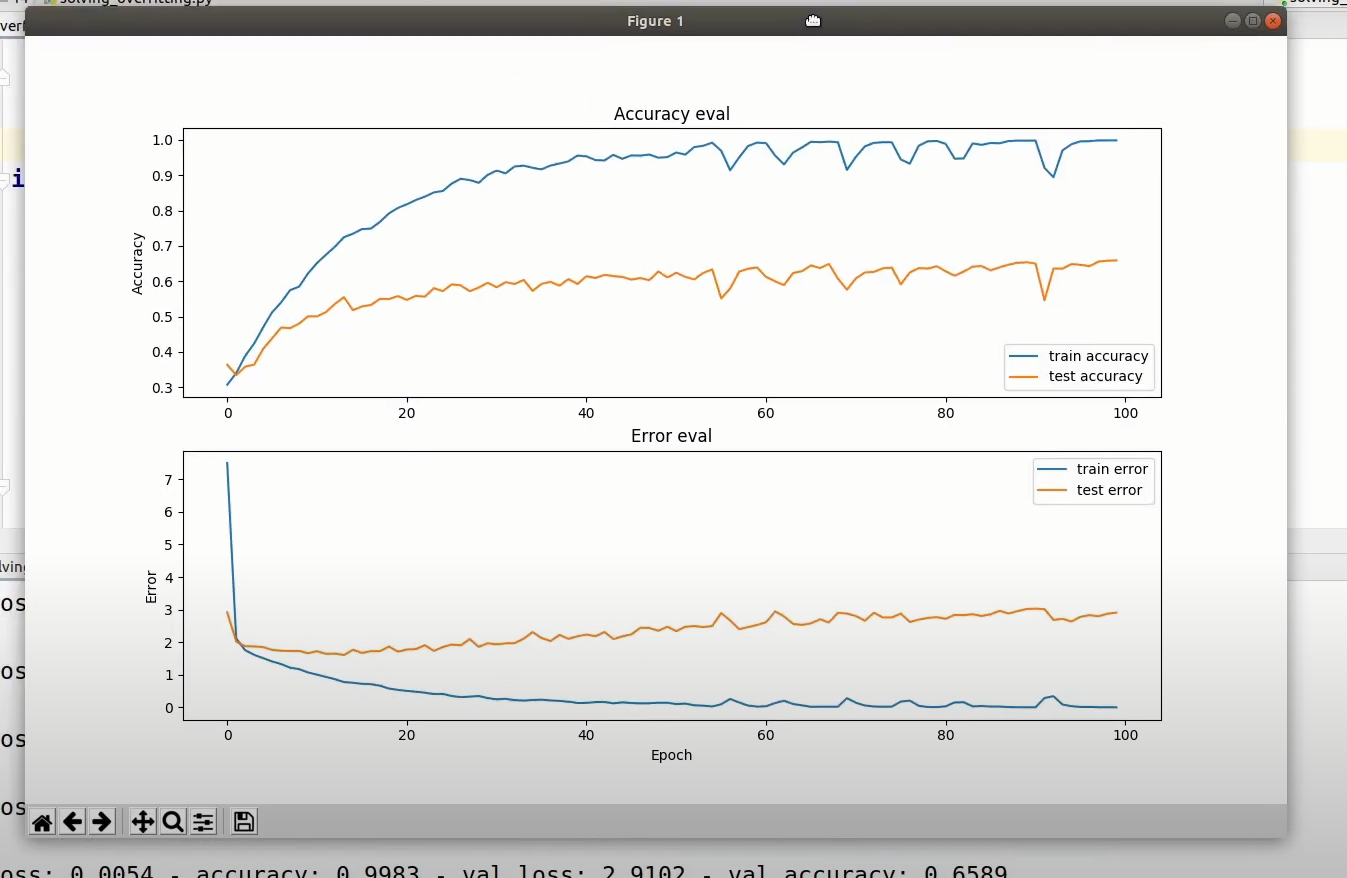

**과적합 방지 방법**

1.데이터 갯수 늘리기


2. 데이터에 변형 가하기

  피치 옮기기, 길이 늘리기, 노이즈 추가등등...



  드롭 아웃(10%~50%),조기 종료도 방법임

  정규화 - 에러에 패널티 부여

In [ ]:
if __name__=="__main__":
  X,y=load_data(DATA_PATH)

  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
# 과적합 방지방법 - 뉴런 갯수 줄이기, 레이어 줄이기
  model=keras.Sequential([
      keras.layers.Flatten(input_shape(X.shape[1],X.shape([2]))),
      #정규화(중요한 요소만 남김),
      keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
      keras.layers.Dropout(0.3),

      keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
      keras.layers.Dropout(0.3),

      keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
      keras.layers.Dropout(0.3),

      keras.layers.Dense(10,activation='softmax')
      ])
  optimiser=keras.optimizers.Adam(learning_rate=0.0001)
  model.compile(optimizer=optimiser,
                loss="space_categorical_crossentropy",
                metrics=['accuracy'])
  model.summary()

  history=model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=32,epochs=100)

  plot(history)

DATA LOADED!


ValueError: With n_samples=0, test_size=0.3 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

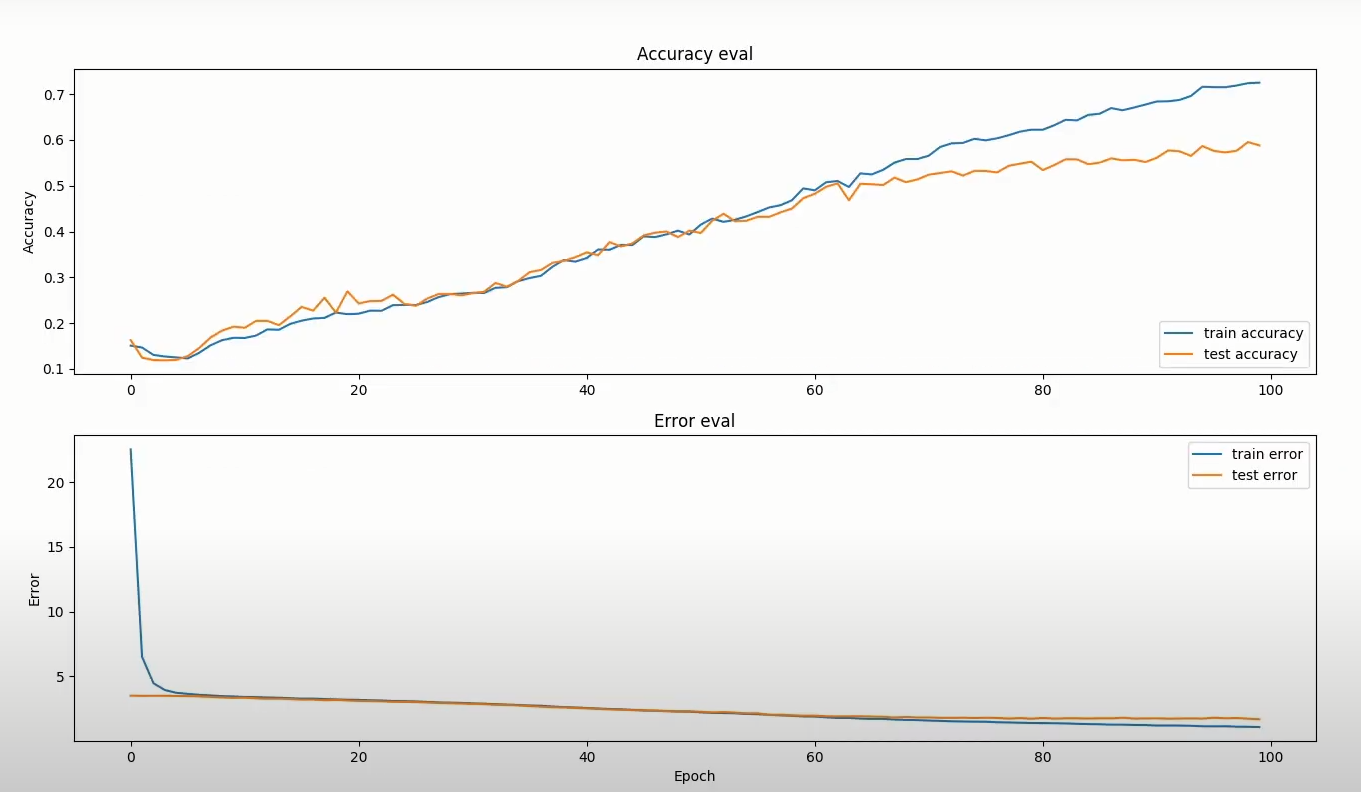